In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/Users/divyasandiman/Downloads/global_Power_plant_database.csv')

In [5]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [9]:
df.notnull().sum()

country                     908
country_long                908
name                        908
gppd_idnr                   908
capacity_mw                 908
latitude                    862
longitude                   862
primary_fuel                908
other_fuel1                 199
other_fuel2                   1
other_fuel3                   0
commissioning_year          528
owner                       342
source                      908
url                         908
geolocation_source          889
wepp_id                       0
year_of_capacity_data       520
generation_gwh_2013         384
generation_gwh_2014         401
generation_gwh_2015         425
generation_gwh_2016         437
generation_gwh_2017         443
generation_data_source      450
estimated_generation_gwh      0
dtype: int64

In [10]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

### Derivation from dataset:
##### 1) There are mnay null values in the dataset. other_fuel3 and other_fuel2,wepp_id can be dropped as they have negligible or no entries.
##### 2) country,country_long,name,gppd_idnr are all identifiers with either a single unique entry of every entry being unique hence have no significance in machine learning
##### 3) url is the website link hence can be dropped

In [11]:
dfnew=df.drop(['country','country_long','name','gppd_idnr','other_fuel3','wepp_id','other_fuel2','generation_data_source'],axis=1)
#Drpping unwanted columns

In [12]:
dfnew.shape

(908, 17)

In [13]:
dfnew.nunique()

capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
estimated_generation_gwh      0
dtype: int64

In [17]:
dfnew['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [20]:
dfnew['commissioning_year'].min() #Finding out the lowest and highest year in commisioning_year

1927.0

In [21]:
dfnew['commissioning_year'].max()

2018.0

In [22]:
dfnew['commissioning_year']=np.where((dfnew['commissioning_year']>=1927) & (dfnew['commissioning_year']<=1950),0,dfnew['commissioning_year'])
#Creating 1st group named as 0 for years between 1927 to 1950

In [24]:
dfnew['commissioning_year']=np.where((dfnew['commissioning_year']>=1951) & (dfnew['commissioning_year']<=1999),1,dfnew['commissioning_year'])
#Creating 2nd group named as 1 for years between 1927 to 1950

In [25]:
dfnew['commissioning_year']=np.where((dfnew['commissioning_year']>=2000) & (dfnew['commissioning_year']<=2018),2,dfnew['commissioning_year'])
#Creating 3rd group named as 2 for years between 1927 to 1950

In [26]:
dfnew['commissioning_year'].value_counts()

2.0    277
1.0    245
0.0      6
Name: commissioning_year, dtype: int64

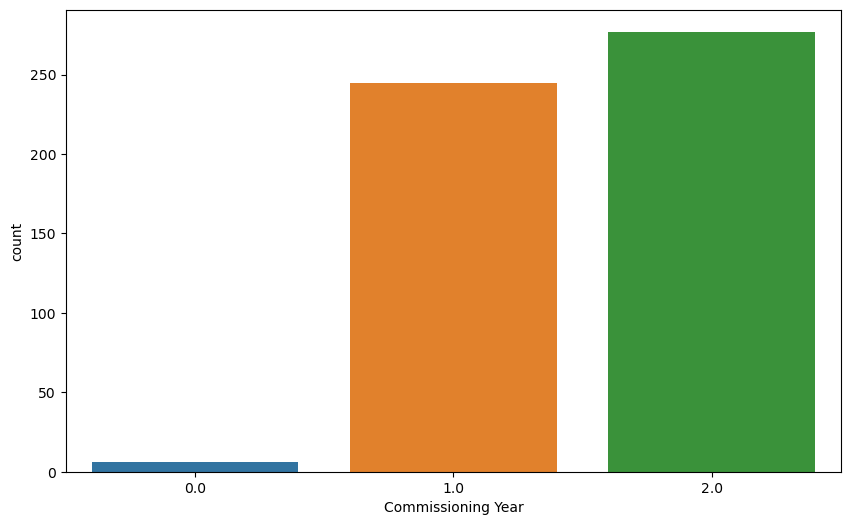

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=dfnew,x=dfnew['commissioning_year'])
plt.xlabel('Commissioning Year')
plt.show()

In [31]:
dfnew['primary_fuel']=dfnew['primary_fuel'].replace(['Biomass','Oil','Nuclear'],'Others')
#creating a new category named others by combining smaller categories

In [32]:
dfnew['primary_fuel'].value_counts()

Coal      259
Hydro     250
Solar     127
Wind      123
Others     80
Gas        69
Name: primary_fuel, dtype: int64

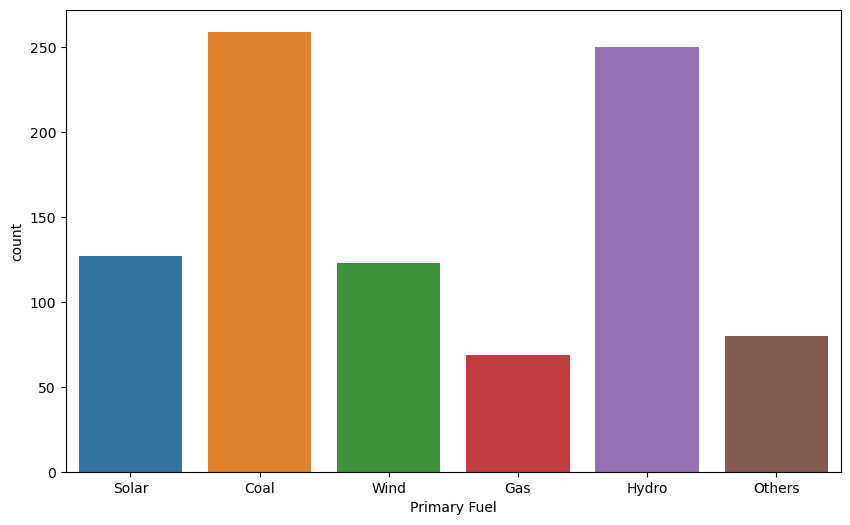

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=dfnew,x=dfnew['primary_fuel'])
plt.xlabel('Primary Fuel')
plt.show()

In [37]:
dfnew = dfnew.dropna(subset=['latitude', 'longitude']) # Dropping nan values from latitude and longitude

In [38]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          862 non-null    float64
 1   latitude             862 non-null    float64
 2   longitude            862 non-null    float64
 3   primary_fuel         862 non-null    object 
 4   other_fuel1          194 non-null    object 
 5   commissioning_year   497 non-null    float64
 6   source               862 non-null    object 
 7   geolocation_source   862 non-null    object 
 8   generation_gwh_2013  378 non-null    float64
 9   generation_gwh_2014  395 non-null    float64
 10  generation_gwh_2015  417 non-null    float64
 11  generation_gwh_2016  427 non-null    float64
 12  generation_gwh_2017  431 non-null    float64
dtypes: float64(9), object(4)
memory usage: 94.3+ KB


In [39]:
dfnew['source'].value_counts()

Central Electricity Authority                                  493
CDM                                                            109
Lancosola                                                       10
National Thermal Power Corporation (NTPC)                        6
National Renewable Energy Laboratory                             4
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [40]:
dfnew['source'].value_counts()[dfnew['source'].value_counts()<5].index

Index(['National Renewable Energy Laboratory',
       'Maharashtra State Power Generation Co Ltd (MAHAGENCO)',
       'Reliance Power Ltd',
       'Rajasthan Renewable Energy Corporation Limited (RREC)',
       'Jk Cement ltd', 'Acc Acc ltd', 'Jaypee Ltd jccl)',
       'Hindustan Zinc ltd', 'PEDA', 'Solairedirect',
       ...
       'Jawahar Ssk ltd', 'Chettinad Corp ltd', 'Purna Ssk ltd', 'Rk Pvt ltd',
       'Essel MP Energy Limited', 'Harsha Engineers Limited',
       'Godawari Energy ltd', 'Sunkon Energy Private Limited',
       'West Bengal Energy Development Corporation Limited (WBEDCL)',
       'Yashwantrao Krishna ssk'],
      dtype='object', length=187)

In [41]:
len(dfnew['source'].value_counts()[dfnew['source'].value_counts()>5].index)

4

In [42]:
CEA=dfnew[dfnew['source']=='Central Electricity Authority']

In [43]:
CEA['primary_fuel'].value_counts()

Hydro     232
Coal      185
Gas        58
Others     18
Name: primary_fuel, dtype: int64

In [44]:
dfnew['other_fuel1'].value_counts()

Oil             191
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

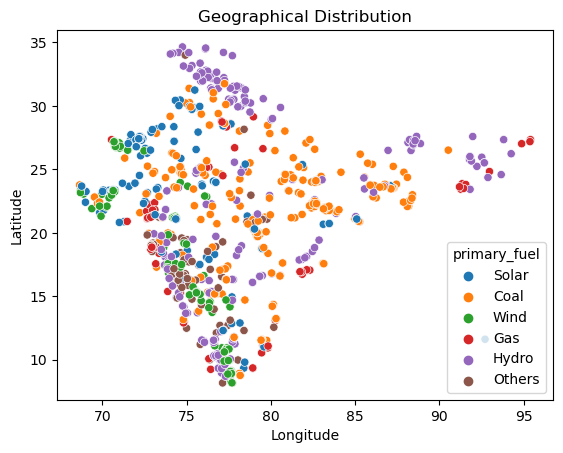

In [46]:
sns.scatterplot(x=dfnew['longitude'], y=dfnew['latitude'], hue=dfnew['primary_fuel'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution')
plt.show()
# Scatter plot of longitude and latitude with hue as primary_fuel to highlight what kind of fuel is 
# used in which location of india.Like we can see that hydro is used majourly in extreme north india and in western 
# and south western india

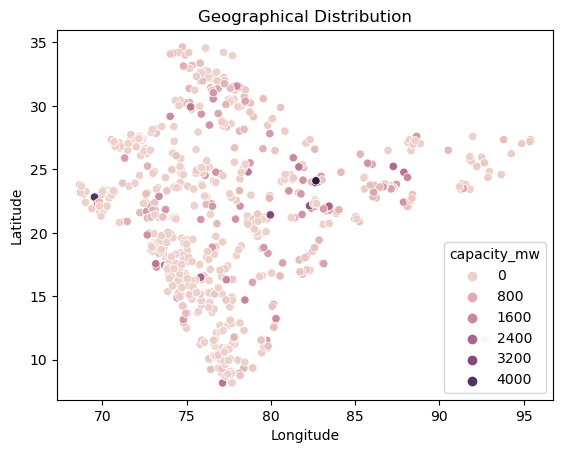

In [47]:
sns.scatterplot(x=dfnew['longitude'], y=dfnew['latitude'], hue=dfnew['capacity_mw'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution')
plt.show()
# Similarly this is for understanding capacity distribution accross india

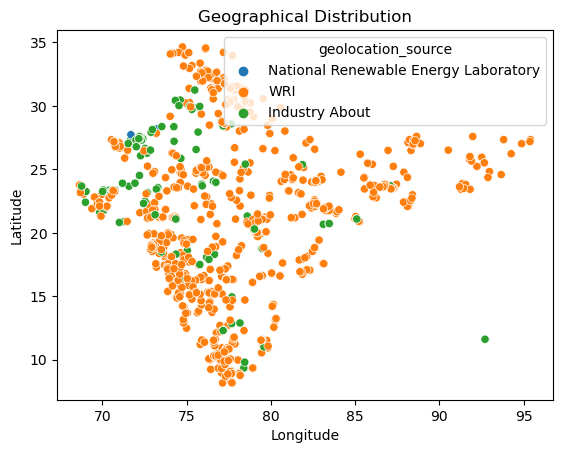

In [49]:

sns.scatterplot(x=dfnew['longitude'], y=dfnew['latitude'], hue=dfnew['geolocation_source'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution')
plt.show()

In [60]:
dfnew[dfnew['capacity_mw']==0]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
830,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN


In [51]:
dfnew.shape

(862, 13)

In [52]:
len(dfnew[dfnew['capacity_mw']<=800])

740

In [53]:
len(dfnew[(dfnew['capacity_mw']>800) & (dfnew['capacity_mw']<=1600)])

89

In [54]:
len(dfnew[(dfnew['capacity_mw']>1600) & (dfnew['capacity_mw']<=2400)])

21

In [55]:
len(dfnew[(dfnew['capacity_mw']>2400) & (dfnew['capacity_mw']<=3600)])

8

In [56]:
len(dfnew[(dfnew['capacity_mw']>3600) & (dfnew['capacity_mw']<=4000)])

2

In [57]:
dfnew['capacity_mw'].min()

0.0

In [58]:
dfnew['capacity_mw'].max()

4760.0

In [ ]:
# In the above few line i am just trying to understand the capacity_mw feature of dataset

In [61]:
dfnew.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [89]:
capacity_by_fuel=dfnew.groupby('primary_fuel')['capacity_mw'].sum()

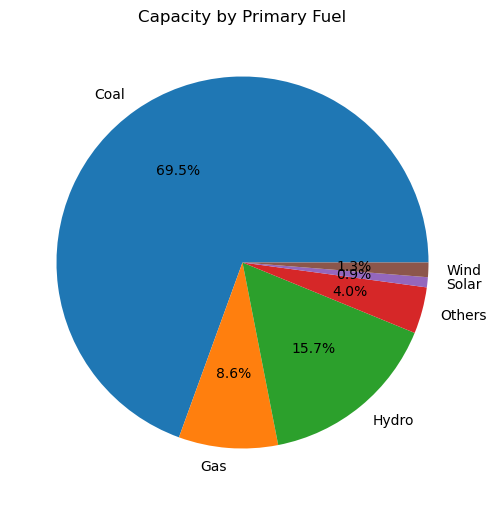

In [90]:
plt.figure(figsize=(6,8))
plt.pie(capacity_by_fuel, labels=capacity_by_fuel.index, autopct='%1.1f%%')
plt.title('Capacity by Primary Fuel')
plt.show()
# This pie chart shows the usage of different fuel types with respect to the total capacity_mw.
# We can see that out of the total capacity_mw generated by all plants 69.5% is due to the use of coal.

In [62]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          862 non-null    float64
 1   latitude             862 non-null    float64
 2   longitude            862 non-null    float64
 3   primary_fuel         862 non-null    object 
 4   other_fuel1          194 non-null    object 
 5   commissioning_year   497 non-null    float64
 6   source               862 non-null    object 
 7   geolocation_source   862 non-null    object 
 8   generation_gwh_2013  378 non-null    float64
 9   generation_gwh_2014  395 non-null    float64
 10  generation_gwh_2015  417 non-null    float64
 11  generation_gwh_2016  427 non-null    float64
 12  generation_gwh_2017  431 non-null    float64
dtypes: float64(9), object(4)
memory usage: 94.3+ KB


In [82]:
gen_by_fuel_2013=dfnew.groupby(['primary_fuel'])['generation_gwh_2013'].sum()

In [86]:
gen_by_fuel_2013

primary_fuel
Coal      673281.215887
Gas        43461.798060
Hydro     134730.860500
Others     32548.049043
Solar          0.000000
Wind           0.000000
Name: generation_gwh_2013, dtype: float64

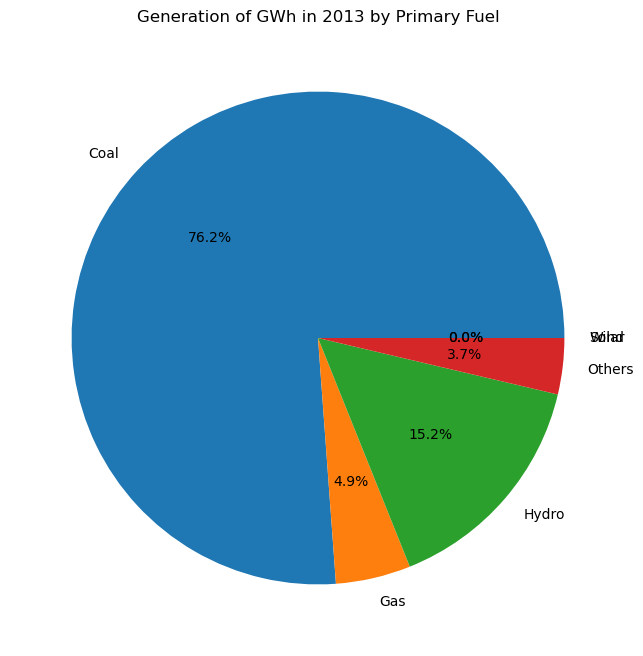

In [85]:
plt.figure(figsize=(8, 8))
plt.pie(gen_by_fuel_2013, labels=gen_by_fuel_2013.index, autopct='%1.1f%%')
plt.title('Generation of GWh in 2013 by Primary Fuel')
plt.show()
# In 2013 the total capacity that was generated 76.2% was done by using coal as primary fuel

In [66]:
dfnew.groupby(['primary_fuel'])['generation_gwh_2014'].sum()

primary_fuel
Coal      764068.435920
Gas        40099.876382
Hydro     129551.355420
Others     36085.862176
Solar          0.000000
Wind           0.000000
Name: generation_gwh_2014, dtype: float64

In [67]:
dfnew.groupby(['primary_fuel'])['generation_gwh_2015'].sum()

primary_fuel
Coal      822401.055975
Gas        46208.780652
Hydro     121353.179625
Others     34117.810943
Solar          0.000000
Wind           0.000000
Name: generation_gwh_2015, dtype: float64

In [68]:
dfnew.groupby(['primary_fuel'])['generation_gwh_2016'].sum()

primary_fuel
Coal      864442.672210
Gas        47463.436563
Hydro     120574.669140
Others     34233.635584
Solar          0.000000
Wind           0.000000
Name: generation_gwh_2016, dtype: float64

In [69]:
dfnew.groupby(['primary_fuel'])['generation_gwh_2017'].sum()

primary_fuel
Coal      908990.323360
Gas        48035.706481
Hydro     124143.723195
Others     34588.492299
Solar          0.000000
Wind           0.000000
Name: generation_gwh_2017, dtype: float64

#### From the above details we can cleary see that coal has been the most widely used fuel type, folowed by hydro and gas

In [78]:
generation_cols=['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017']

In [80]:
dfnew[generation_cols]=dfnew[generation_cols].fillna(0) # filling 0 in place of nan values

In [81]:
dfnew.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1            668
commissioning_year     365
source                   0
geolocation_source       0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

In [105]:
# Frequency Encoding for 'primary_fuel'
primary_fuel_freq = dfnew['primary_fuel'].value_counts()
dfnew['primary_fuel_encoded'] = dfnew['primary_fuel'].map(primary_fuel_freq)

# Frequency Encoding for 'source'
source_freq = dfnew['source'].value_counts()
dfnew['source_encoded'] = dfnew['source'].map(source_freq)

# Frequency Encoding for 'geolocation_source'
geolocation_source_freq = dfnew['geolocation_source'].value_counts()
dfnew['geolocation_source_encoded'] = dfnew['geolocation_source'].map(geolocation_source_freq)

In [106]:
dfnew

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel_encoded,source_encoded,geolocation_source_encoded
0,2.5,28.1839,73.2407,Solar,NaN,2.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.000000,0.000000,0.000000,0.000000,0.000000,123,4,4
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,254,2,739
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,108,109,739
3,135.0,23.8712,91.3602,Gas,NaN,2.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,68,493,739
4,1800.0,21.9603,82.4091,Coal,Oil,2.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,254,493,739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,2.0,Central Electricity Authority,WRI,0.000000,0.000000,0.994875,233.596650,865.400000,254,493,739
904,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,0.000000,0.000000,0.000000,0.000000,0.000000,123,3,119
905,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,108,109,739
906,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,254,3,739


In [107]:
tr = dfnew[dfnew['commissioning_year'].notnull()]
te = dfnew[dfnew['commissioning_year'].isnull()]

x_train = tr.drop(columns=['commissioning_year','other_fuel1','primary_fuel','source','geolocation_source'])
y_train = tr['commissioning_year']
x_test = te.drop(columns=['commissioning_year','other_fuel1','primary_fuel','source','geolocation_source'])
# This is an inportant step where i am trying to predict the missing values in the commissioning_year column
# first seperating training and testing data. Testing wil. be the ones with null values

In [108]:
x_train

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel_encoded,source_encoded,geolocation_source_encoded
0,2.5,28.1839,73.2407,0.000000,0.000000,0.000000,0.000000,0.000000,123,4,4
3,135.0,23.8712,91.3602,631.777928,617.789264,843.747000,886.004428,663.774500,68,493,739
4,1800.0,21.9603,82.4091,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,254,493,739
5,250.0,23.7689,68.6447,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,254,493,739
6,60.0,10.4547,77.0078,147.568450,157.558250,152.195200,61.421350,89.629600,232,493,739
...,...,...,...,...,...,...,...,...,...,...,...
893,16.0,17.1401,73.8660,0.000000,0.000000,0.000000,0.000000,0.000000,232,493,739
894,62.4,30.3033,77.5684,203.975000,184.453100,183.000000,204.253600,175.866250,232,493,739
900,600.0,30.1081,77.3257,3158.016000,3194.359820,3709.552200,3123.572061,3156.053669,254,493,739
902,106.6,13.1156,77.5838,20.900000,0.000000,0.000000,0.000000,0.000000,77,493,739


In [109]:
y_train

0      2.0
3      2.0
4      2.0
5      2.0
6      1.0
      ... 
893    1.0
894    1.0
900    2.0
902    1.0
903    2.0
Name: commissioning_year, Length: 497, dtype: float64

In [110]:
x_test

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel_encoded,source_encoded,geolocation_source_encoded
1,98.0,24.7663,74.6090,0.0,0.0,0.0,0.0,0.0,254,2,739
2,39.2,21.9038,69.3732,0.0,0.0,0.0,0.0,0.0,108,109,739
17,600.0,23.0666,81.7841,0.0,0.0,0.0,0.0,0.0,254,1,739
19,10.0,18.0845,76.1851,0.0,0.0,0.0,0.0,0.0,77,1,739
20,17.0,19.5867,74.7061,0.0,0.0,0.0,0.0,0.0,77,1,739
...,...,...,...,...,...,...,...,...,...,...,...
901,16.0,17.1653,74.2456,0.0,0.0,0.0,0.0,0.0,77,1,739
904,3.0,12.8932,78.1654,0.0,0.0,0.0,0.0,0.0,123,3,119
905,25.5,15.2758,75.5811,0.0,0.0,0.0,0.0,0.0,108,109,739
906,80.0,24.3500,73.7477,0.0,0.0,0.0,0.0,0.0,254,3,739


In [112]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Predict the missing values in commissioning_years column
predicted_years = model.predict(x_test)



In [115]:
predicted_years

array([1.68, 1.7 , 1.99, 1.12, 1.08, 1.31, 1.87, 1.66, 1.12, 1.44, 1.32,
       1.12, 1.15, 1.73, 1.73, 1.73, 1.73, 1.73, 1.73, 1.73, 1.34, 1.9 ,
       1.55, 1.56, 1.14, 1.99, 1.25, 1.17, 1.54, 1.59, 1.63, 1.64, 1.25,
       1.67, 1.16, 1.83, 1.7 , 1.3 , 1.65, 1.6 , 1.69, 1.14, 1.69, 1.7 ,
       1.71, 1.71, 1.66, 1.65, 1.85, 1.7 , 1.72, 1.6 , 1.3 , 1.32, 1.67,
       1.65, 1.37, 1.69, 1.79, 1.47, 1.83, 1.86, 1.62, 1.92, 1.96, 1.67,
       1.35, 1.32, 1.71, 1.59, 1.3 , 1.83, 1.63, 1.29, 1.29, 1.22, 1.13,
       1.25, 1.2 , 1.74, 1.32, 1.25, 1.74, 1.37, 1.51, 1.77, 1.67, 1.74,
       1.16, 1.62, 1.27, 1.15, 1.4 , 1.68, 1.48, 1.35, 1.84, 1.3 , 1.81,
       1.7 , 1.3 , 1.83, 1.71, 1.72, 1.33, 1.8 , 1.24, 1.53, 1.62, 1.34,
       1.52, 1.39, 1.24, 1.07, 1.23, 1.22, 1.37, 1.44, 1.74, 1.73, 1.23,
       1.24, 1.41, 1.36, 1.85, 1.65, 1.65, 1.68, 1.97, 1.96, 1.92, 1.59,
       1.37, 1.7 , 1.54, 1.57, 1.68, 1.16, 1.62, 1.67, 1.12, 1.56, 1.09,
       1.67, 1.25, 1.2 , 1.2 , 1.13, 1.11, 1.23, 1.

In [113]:
# Fill the missing values in the original dataframe
dfnew.loc[dfnew['commissioning_year'].isnull(), 'commissioning_year'] = predicted_years

In [114]:
dfnew.isnull().sum()

capacity_mw                     0
latitude                        0
longitude                       0
primary_fuel                    0
other_fuel1                   668
commissioning_year              0
source                          0
geolocation_source              0
generation_gwh_2013             0
generation_gwh_2014             0
generation_gwh_2015             0
generation_gwh_2016             0
generation_gwh_2017             0
primary_fuel_encoded            0
source_encoded                  0
geolocation_source_encoded      0
dtype: int64

In [118]:
dfnew['commissioning_year']=dfnew['commissioning_year'].round() # Rounding off the predicted values

In [127]:
dfnew['commissioning_year'].values

array([2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2.,
       2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1.,
       2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
       1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2.,
       2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2.,
       2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2.,
       1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2.,
       1., 1., 2., 1., 1.

In [128]:
dfnew.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel_encoded,source_encoded,geolocation_source_encoded
0,2.5,28.1839,73.2407,Solar,NaN,2.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.000000,0.000000,0.000,0.000000,0.000000,123,4,4
1,98.0,24.7663,74.6090,Coal,NaN,2.0,Ultratech Cement ltd,WRI,0.000000,0.000000,0.000,0.000000,0.000000,254,2,739
2,39.2,21.9038,69.3732,Wind,NaN,2.0,CDM,WRI,0.000000,0.000000,0.000,0.000000,0.000000,108,109,739
3,135.0,23.8712,91.3602,Gas,NaN,2.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500,68,493,739
4,1800.0,21.9603,82.4091,Coal,Oil,2.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,254,493,739


In [129]:
dfnew['other_fuel1'].value_counts()

Oil             191
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [483]:
dfnew[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017']].dropna()

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,631.777928,617.789264,843.74700,886.004428,663.774500
4,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736
5,821.798000,1153.421000,1208.85200,1175.765000,1147.913000
6,147.568450,157.558250,152.19520,61.421350,89.629600
7,696.738800,674.391100,721.33520,675.724400,679.594950
...,...,...,...,...,...
883,435.710500,1806.860300,1204.59675,2031.839750,2150.095500
890,4542.028000,6753.870000,5161.53800,3539.630000,7018.217000
891,2311.320000,1045.820000,1651.15890,1229.480000,999.170000
894,203.975000,184.453100,183.00000,204.253600,175.866250


In [130]:
dfnew['other_fuel1_binary'] = np.where(dfnew['other_fuel1'].isnull(), 0, 1) # filling null values with 0'S and not null with 1's

In [131]:
dfnew.head(2)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel_encoded,source_encoded,geolocation_source_encoded,other_fuel1_binary
0,2.5,28.1839,73.2407,Solar,NaN,2.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.0,0.0,0.0,0.0,0.0,123,4,4,0
1,98.0,24.7663,74.6090,Coal,NaN,2.0,Ultratech Cement ltd,WRI,0.0,0.0,0.0,0.0,0.0,254,2,739,0


In [132]:
xpf=dfnew.drop(['primary_fuel','other_fuel1','source','geolocation_source','primary_fuel_encoded'],axis=1)
#creating x data

In [136]:
xpf.head(2)

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,source_encoded,geolocation_source_encoded,other_fuel1_binary
0,2.5,28.1839,73.2407,2.0,0.0,0.0,0.0,0.0,0.0,4,4,0
1,98.0,24.7663,74.6090,2.0,0.0,0.0,0.0,0.0,0.0,2,739,0


In [155]:
xpf['avg_generation']=dfnew[['generation_gwh_2013','generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017']].mean(axis=1)
# creating new column named avg_generation which has the mean of all generated values accross the generation years

In [151]:
xpf.drop(['generation_gwh_2013','generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017'],axis=1,inplace=True)
#dropping all generation columns

In [159]:
xpf.head(5)

,capacity_mw,latitude,longitude,commissioning_year,source_encoded,geolocation_source_encoded,other_fuel1_binary,avg_generation
0,2.5,28.1839,73.2407,2.0,4,4,0,0.000000
1,98.0,24.7663,74.6090,2.0,2,739,0,0.000000
2,39.2,21.9038,69.3732,2.0,109,739,0,0.000000
3,135.0,23.8712,91.3602,2.0,493,739,0,728.618624
4,1800.0,21.9603,82.4091,2.0,493,739,1,4449.757947


In [137]:
ypf=dfnew['primary_fuel']
#creating y data

In [141]:
ypf.head(5)

0    Solar
1     Coal
2     Wind
3      Gas
4     Coal
Name: primary_fuel, dtype: object

In [160]:
xpf.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'source_encoded', 'geolocation_source_encoded', 'other_fuel1_binary',
       'avg_generation'],
      dtype='object')

In [161]:
scale_cols=['capacity_mw', 'latitude', 'longitude']

<Axes: >

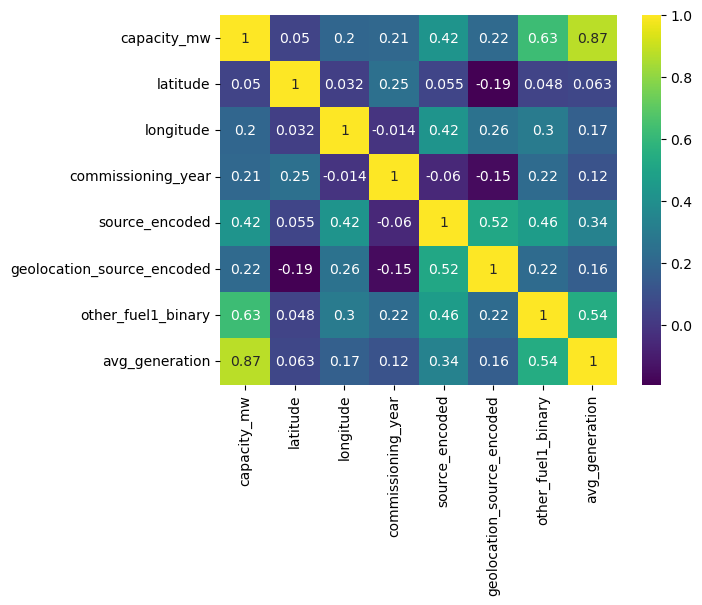

In [162]:
sns.heatmap(data=xpf.corr(),annot=True,cmap='viridis')

In [ ]:
# Below steps are creating the various Pipelines and transformers

In [164]:
transform = ColumnTransformer(
    transformers=[
        ('Scaler', StandardScaler(), scale_cols)    
    ],
    remainder='passthrough'
)

In [165]:
pipe=Pipeline(steps=[
    ('Preprocessor',transform),
    ('model',RandomForestClassifier())
]
)

In [166]:
models=[
    { 
    'model':[RandomForestClassifier()],
    
    },
   {
    'model':[GradientBoostingClassifier()]
   
    },
    {

    'model':[SVC()]
    
    },
    {

    'model':[LogisticRegression()],

    }
]

In [167]:
xpf_train,xpf_test,ypf_train,ypf_test=train_test_split(xpf,ypf,test_size=0.2,random_state=42)

In [168]:
grid=GridSearchCV(pipe,models,cv=5,scoring='accuracy',verbose=2)

In [169]:
grid.fit(xpf_train,ypf_train) # training data

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................model=RandomForestClassifier(); total time=   0.8s
[CV] END .....................model=RandomForestClassifier(); total time=   0.6s
[CV] END .....................model=RandomForestClassifier(); total time=   0.8s
[CV] END .....................model=RandomForestClassifier(); total time=   0.6s
[CV] END .....................model=RandomForestClassifier(); total time=   0.6s
[CV] END .................model=GradientBoostingClassifier(); total time=   2.7s
[CV] END .................model=GradientBoostingClassifier(); total time=   2.7s
[CV] END .................model=GradientBoostingClassifier(); total time=   2.8s
[CV] END .................model=GradientBoostingClassifier(); total time=   3.4s
[CV] END .................model=GradientBoostingClassifier(); total time=   2.7s
[CV] END ........................................model=SVC(); total time=   0.1s
[CV] END ........................................

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Scaler',
                                                                         StandardScaler(),
                                                                         ['capacity_mw',
                                                                          'latitude',
                                                                          'longitude'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid=[{'model': [RandomForestClassifier()]},
                         {'model': [GradientBoostingClassifier()]},
                         {'model': [SVC()]},
                         {'model': [LogisticRegression()]}],
             scoring='accuracy', verbose=2)

In [170]:
grid.best_params_

{'model': RandomForestClassifier()}

In [171]:
grid.best_score_ # Accuracy is 92.5%

0.9245318946366232

In [174]:
param_grid = [{
    'model':[RandomForestClassifier()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__bootstrap': [True, False],
    'model__criterion': ['gini', 'entropy']
}]
# Now since we have the model. Creating a prameter grid to extract best parameter through gridsearchcv

In [175]:
rfc_grid=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy',verbose=2)


In [176]:
rfc_grid.fit(xpf_train,ypf_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV] END model=RandomForestClassifier(), model__bootstrap=True, model__criterion=gini, model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   0.1s
[CV] END model=RandomForestClassifier(), model__bootstrap=True, model__criterion=gini, model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   0.1s
[CV] END model=RandomForestClassifier(), model__bootstrap=True, model__criterion=gini, model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   0.1s
[CV] END model=RandomForestClassifier(), model__bootstrap=True, model__criterion=gini, model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   0.1s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Scaler',
                                                                         StandardScaler(),
                                                                         ['capacity_mw',
                                                                          'latitude',
                                                                          'longitude'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid=[{'model': [RandomForestClassifier(max_features='auto',
                                                           min_samples_split=5)],
                          'model__bootstrap': [True, False],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [None, 10, 20, 30],
                          'model__max_features': ['auto', 'sqrt', 'log2'],
                          'model__min_samples_leaf': [1, 2, 4],
                          'model__min_samples_split': [2, 5, 10],
                          'model__n_estimators': [50, 100, 200]}],
             scoring='accuracy', verbose=2)

In [177]:
rfc_grid.best_params_ # These are the best parameters

{'model': RandomForestClassifier(max_features='auto', min_samples_split=5),
 'model__bootstrap': True,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 5,
 'model__n_estimators': 100}

In [181]:
rfc=rfc_grid.best_estimator_

In [182]:
pred=rfc.predict(xpf_test)

In [183]:
accuracy_score(ypf_test,pred) # Accuracy has improved

0.930635838150289

In [188]:
newdata=xpf[4:8]

In [189]:
newpred = rfc.predict(newdata)

In [194]:
print('Actual Values for new data are :', ypf[4:8])
print('Predicted values for new data are : ', newpred)

Actual Values for new data are : 4     Coal
5     Coal
6    Hydro
7    Hydro
Name: primary_fuel, dtype: object
Predicted values for new data are :  ['Coal' 'Coal' 'Hydro' 'Hydro']


# Hence the Model to predict primary_fuel is working very well with a 93 % accuracy.

### Moving on to predicting capacity_mw

In [196]:
dfnew

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel_encoded,source_encoded,geolocation_source_encoded,other_fuel1_binary
0,2.5,28.1839,73.2407,Solar,NaN,2.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.000000,0.000000,0.000000,0.000000,0.000000,123,4,4,0
1,98.0,24.7663,74.6090,Coal,NaN,2.0,Ultratech Cement ltd,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,254,2,739,0
2,39.2,21.9038,69.3732,Wind,NaN,2.0,CDM,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,108,109,739,0
3,135.0,23.8712,91.3602,Gas,NaN,2.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,68,493,739,0
4,1800.0,21.9603,82.4091,Coal,Oil,2.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,254,493,739,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,2.0,Central Electricity Authority,WRI,0.000000,0.000000,0.994875,233.596650,865.400000,254,493,739,1
904,3.0,12.8932,78.1654,Solar,NaN,1.0,Karnataka Power Corporation Limited,Industry About,0.000000,0.000000,0.000000,0.000000,0.000000,123,3,119,0
905,25.5,15.2758,75.5811,Wind,NaN,1.0,CDM,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,108,109,739,0
906,80.0,24.3500,73.7477,Coal,NaN,2.0,Hindustan Zinc ltd,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,254,3,739,0


In [199]:
dfnew['Avg_Generation']=dfnew[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017']].mean(axis=1)

In [254]:
dfnew.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'primary_fuel_encoded',
       'source_encoded', 'geolocation_source_encoded', 'other_fuel1_binary',
       'Avg_Generation', 'Encoded_fuel', 'le_primaryfuel'],
      dtype='object')

In [489]:
dfnew[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017']]=dfnew[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017']].replace(0,np.nan)

In [490]:
dfcopy=dfnew.copy()

In [491]:
dfcopy=dfcopy.drop('other_fuel1',axis=1)

In [494]:
dfcopy.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'primary_fuel_encoded',
       'source_encoded', 'geolocation_source_encoded', 'other_fuel1_binary',
       'Avg_Generation', 'Encoded_fuel', 'le_primaryfuel'],
      dtype='object')

In [495]:
dfcopy=dfcopy.drop(['primary_fuel','source', 'geolocation_source','primary_fuel_encoded','Avg_Generation','le_primaryfuel'],axis=1)

In [498]:
dfcopy.dropna(inplace=True)

In [499]:
dfcopy

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,source_encoded,geolocation_source_encoded,other_fuel1_binary,Encoded_fuel
3,135.0,23.8712,91.3602,2.0,631.777928,617.789264,843.74700,886.004428,663.774500,493,739,0,5
4,1800.0,21.9603,82.4091,2.0,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,493,739,1,0
5,250.0,23.7689,68.6447,2.0,821.798000,1153.421000,1208.85200,1175.765000,1147.913000,493,739,1,0
6,60.0,10.4547,77.0078,1.0,147.568450,157.558250,152.19520,61.421350,89.629600,493,739,0,1
7,192.0,32.2258,77.2070,2.0,696.738800,674.391100,721.33520,675.724400,679.594950,493,739,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,400.0,30.5669,79.5468,2.0,435.710500,1806.860300,1204.59675,2031.839750,2150.095500,493,739,0,1
890,1470.0,22.8725,73.3588,1.0,4542.028000,6753.870000,5161.53800,3539.630000,7018.217000,493,739,1,0
891,540.0,20.2727,78.9792,2.0,2311.320000,1045.820000,1651.15890,1229.480000,999.170000,493,739,1,0
894,62.4,30.3033,77.5684,1.0,203.975000,184.453100,183.00000,204.253600,175.866250,493,739,0,1


In [500]:
x_copy=dfcopy.drop('capacity_mw',axis=1)

In [501]:
x_copy.head(2)

,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,source_encoded,geolocation_source_encoded,other_fuel1_binary,Encoded_fuel
3,23.8712,91.3602,2.0,631.777928,617.789264,843.747,886.004428,663.774500,493,739,0,5
4,21.9603,82.4091,2.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,493,739,1,0


In [502]:
y_copy=dfcopy['capacity_mw']

In [503]:
y_copy

3       135.0
4      1800.0
5       250.0
6        60.0
7       192.0
        ...  
883     400.0
890    1470.0
891     540.0
894      62.4
900     600.0
Name: capacity_mw, Length: 337, dtype: float64

In [504]:
x_copy.columns

Index(['latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'source_encoded', 'geolocation_source_encoded',
       'other_fuel1_binary', 'Encoded_fuel'],
      dtype='object')

In [505]:
scaler_cols=['latitude', 'longitude', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017']

In [506]:
transform2=ColumnTransformer(
transformers=[
    ('scaler',StandardScaler(),scaler_cols)
],
remainder='passthrough'
) # Creating transformer

In [529]:
pipe2=Pipeline(
steps=[
    ('processor',transform2),
    ('ml',RandomForestRegressor())
]
) # Creating pipeline

In [530]:
grid2=[
    {'ml':[RandomForestRegressor()]},
    {'ml':[LinearRegression()]},
    {'ml':[GradientBoostingRegressor()]}   
]
# Creating model grid

In [4]:
xtrain,xtest,ytrain,ytest=train_test_split(x_copy,y_copy,test_size=0.2,random_state=45)

NameError: name 'train_test_split' is not defined

In [2]:
gcv=GridSearchCV(pipe2,grid2,cv=5,scoring='r2',verbose=2)

NameError: name 'GridSearchCV' is not defined

In [3]:
gcv.fit(xtrain,ytrain)

NameError: name 'gcv' is not defined

In [599]:
gcv.best_params_

{'ml': RandomForestRegressor()}

In [600]:
gcv.best_score_ # Score is 89%

0.8936661628251018

In [1]:
rfr=gcv.best_estimator_

NameError: name 'gcv' is not defined

In [602]:
pr=rfr.predict(xtest)